In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten#二维卷积，二维最大池化，数据扁平化（二维数据扁平化为以为数据）
from keras.optimizers import SGD,Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [2]:
#载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data()#这里尚未转换为one hot
#（60000，28，28）--》（60000，28，28，1）#最后一个维度表示图像的通道数目
x_train = x_train.reshape(-1,28,28,1)/255.0 #-1表示任何值，会自动判断
x_test = x_test.reshape(-1,28,28,1)/255.0 #-1表示任何值，会自动判断
#转换为one hot
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

In [3]:
#定义顺序模型
model = Sequential()
#定义第一个卷积层
model.add(Convolution2D(
    input_shape=(28,28,1),#输入平面
    filters=32,#卷积核/滤波器个数
    kernel_size=5,#卷积窗口大小
    strides=1,#步长
    padding = 'same',#padding方式 same/valid
    activation='relu'#激活函数
))
#第一个池化层
model.add(MaxPooling2D(#因为上一步为28 28，有32特征图，这一步变为14x14 还是32特征图
    pool_size=2,
    strides=2,
    padding='same'
))

#第二个卷积层
model.add(Convolution2D(
    64,5,strides=1,padding='same',activation='relu'#64个特征图
))
#第二个池化层
model.add(MaxPooling2D(#7x7  64个特征图
    2,2,'same'
))


#将第二个池化层的输出扁平化为1维
model.add(Flatten())#长度为64x7x7
#第一个全连接层
model.add(Dense(1024,activation='relu'))
#Dropout
model.add(Dropout(0.5))
#第二个全连接层
model.add(Dense(10,activation='softmax'))

# #定义优化器
# adam = Adam(lr=1e-4)
# #定义优化器 loss function 训练过程中计算准确率
# model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
# #训练模型
# model.fit(x_train,y_train,batch_size=64,epochs=10)
# loss,accuracy=model.evaluate(x_test,y_test)
# print('loss',loss)
# print('acc',accuracy)

In [4]:
# 比较耗时

# 卷积神经网络

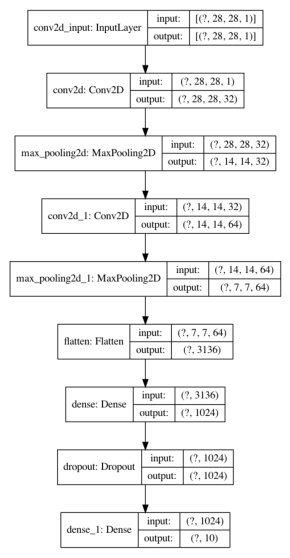

In [5]:
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names='False',rankdir='TB')#从上到下 
plt.figure(figsize=(10,10))
img = plt.imread('model.png')
plt.imshow(img)
plt.axis('off')
plt.show()